In [8]:
from sklearn.metrics import classification_report, f1_score, precision_score, accuracy_score

In [1]:
import statistics
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
def report_folder(label, fold_no):
    predictions = []
    labels = []
    
    for i in range(1, fold_no + 1):
        with open('results/' + label + '/' + str(i) + '-predicted.txt', 'r') as file:
            for _predictions in file.readlines():
                predictions += list(_predictions)[:-1]

        with open('results/' + label + '/' + str(i) + '-label.txt', 'r') as file:
            for _labels in file.readlines():
                labels += list(_labels)[:-1]
    
    print(classification_report(labels, predictions))

In [6]:
def report_folder_n(label, fold_no):
    predictions = []
    labels = []
    f1_n = []
    accuracy_n = []
    
    for n in range(30):
        _predictions_n = []
        _labels_n = []
        for i in range(1, fold_no + 1):
            with open('results/' + label + '/' + str(n) + '/' + str(i) + '-predicted.txt', 'r') as file:
                for _predictions in file.readlines():
                    predictions += list(_predictions)[:-1]
                    _predictions_n += list(_predictions)[:-1]

            with open('results/' + label + '/' + str(n) + '/' + str(i) + '-label.txt', 'r') as file:
                for _labels in file.readlines():
                    labels += list(_labels)[:-1]
                    _labels_n += list(_labels)[:-1]
        
        f1_n.append(f1_score(_labels_n, _predictions_n, average='weighted') * 100)
        accuracy_n.append(accuracy_score(_labels_n, _predictions_n) * 100)
        
    print("f1: " + str(sum(f1_n)/len(f1_n)))
    print("accuracy: " + str(sum(accuracy_n)/len(accuracy_n)))
    
    print("f1 std: " + str(statistics.stdev(f1_n)))
    print("accuracy std: " + str(statistics.stdev(accuracy_n)))
    
    return f1_n, accuracy_n
    #print("f1: " + str(f1_score(labels, predictions, average='weighted') * 100))
    #print("accuracy: " + str(accuracy_score(labels, predictions) * 100))
    #print(classification_report(labels, predictions))

In [9]:
f1_dt, accuracy_dt = report_folder_n('sophia-rf', 10)

ValueError: Found input variables with inconsistent numbers of samples: [9318, 231818]

In [43]:
f1_gb, accuracy_gb = report_folder_n('sophia-gb', 10)

f1: 76.81903902172887
accuracy: 76.63947914430852
f1 std: 0.23390928768230165
accuracy std: 0.22737787555876374


In [44]:
f1_knn, accuracy_knn = report_folder_n('sophia-knn', 10)

f1: 69.10972300326928
accuracy: 67.20469342491235
f1 std: 0.24288367535586977
accuracy std: 0.2579470930272114


In [45]:
f1_mlp, accuracy_mlp = report_folder_n('sophia-mlp', 10)

f1: 72.1270068218602
accuracy: 70.48472490520139
f1 std: 0.3529553430296202
accuracy std: 0.41276582748956064


In [46]:
f1_rf, accuracy_rf = report_folder_n('sophia-rf', 10)

f1: 78.59620972892769
accuracy: 78.20598125491878
f1 std: 0.2302609230313275
accuracy std: 0.23094366879447892


In [47]:
f1_svm, accuracy_svm = report_folder_n('sophia-svm', 10)

f1: 65.34500536654805
accuracy: 66.58796594405094
f1 std: 0.22659095784423894
accuracy std: 0.22531444059909075


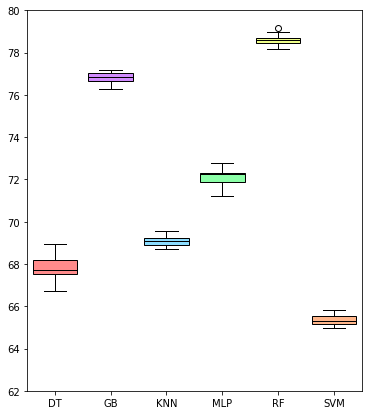

In [106]:
fig, ax = plt.subplots()


box = ax.boxplot([f1_dt, f1_gb, f1_knn, f1_mlp, f1_rf, f1_svm],  patch_artist=True, widths=(0.8))
plt.xticks([1, 2, 3, 4, 5, 6], ["DT", "GB", "KNN", "MLP", "RF", "SVM"])

plt.ylim(62, 80)

colors = ['#FF8B8B', '#D18BFF',
          '#8BDDFF', '#8BFFA7',
          '#F0FF8B', '#FFB68B']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for median in box['medians']:
    median.set_color('black')
    
plt.savefig('f1.png', dpi=300)
plt.show()

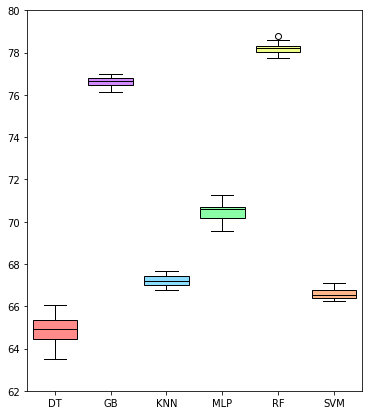

In [107]:
fig, ax = plt.subplots()
box = ax.boxplot([accuracy_dt, accuracy_gb, accuracy_knn, accuracy_mlp, accuracy_rf, accuracy_svm],  patch_artist=True, widths=(0.8))
plt.xticks([1, 2, 3, 4, 5, 6], ["DT", "GB", "KNN", "MLP", "RF", "SVM"])


colors = ['#FF8B8B', '#D18BFF',
          '#8BDDFF', '#8BFFA7',
          '#F0FF8B', '#FFB68B']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for median in box['medians']:
    median.set_color('black')

plt.ylim(62, 80)
plt.savefig('accuracy.png', dpi=300)
plt.show()

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 7